<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-objectives" data-toc-modified-id="Learning-objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning objectives</a></span></li><li><span><a href="#Making-random-numbers" data-toc-modified-id="Making-random-numbers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Making random numbers</a></span><ul class="toc-item"><li><span><a href="#Create-1000-uniformly-distributed-random-numbers-in-the-inteval-[0,1)" data-toc-modified-id="Create-1000-uniformly-distributed-random-numbers-in-the-inteval-[0,1)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create 1000 uniformly distributed random numbers in the inteval [0,1)</a></span></li><li><span><a href="#Repeat-for-a-normal-distribution-with-$\mu$,-and-$\sigma$-from-11-pandas4" data-toc-modified-id="Repeat-for-a-normal-distribution-with-$\mu$,-and-$\sigma$-from-11-pandas4-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Repeat for a normal distribution with $\mu$, and $\sigma$ from 11-pandas4</a></span><ul class="toc-item"><li><span><a href="#First-read-in-the-$\mu$,-$\sigma$-values-from-fit_metadata.json" data-toc-modified-id="First-read-in-the-$\mu$,-$\sigma$-values-from-fit_metadata.json-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>First read in the $\mu$, $\sigma$ values from <code>fit_metadata.json</code></a></span></li><li><span><a href="#Now-pull-the-mean-and-standard-deviation-for-spring" data-toc-modified-id="Now-pull-the-mean-and-standard-deviation-for-spring-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Now pull the mean and standard deviation for spring</a></span></li></ul></li></ul></li><li><span><a href="#lognormal-random-numbers-with-$\mu=1$,-$\log-\sigma=0.1$" data-toc-modified-id="lognormal-random-numbers-with-$\mu=1$,-$\log-\sigma=0.1$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>lognormal random numbers with $\mu=1$, $\log \sigma=0.1$</a></span></li><li><span><a href="#Correlated-random-numbers" data-toc-modified-id="Correlated-random-numbers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlated random numbers</a></span></li><li><span><a href="#Your-turn" data-toc-modified-id="Your-turn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Your turn</a></span></li></ul></div>

# Random number generation

Some examples demonstrating how to generate random numbers using
https://docs.scipy.org/doc/numpy/reference/routines.random.html

## Learning objectives

1. Demonstrate random number utilities in numpy.random 
   and scipy.stats
   
1. Use the paramter estimates generated by the 11-pandas4 notebook
   to generate seasonal precipitation and temperature data that
   fits the observed normal (temperature) and exponential (precipitation)
   data at YVR airport


## Making random numbers

For this notebook, `import context` defines the Path
object for `notebooks/pandas/data/processed` so that
we can find the `fit_metadata.json` file written by 11-pandas4

### Create 1000 uniformly distributed random numbers in the inteval [0,1)

In [1]:
import numpy as np
import numpy.random as rn
import pandas as pd
from matplotlib import colors
from matplotlib import pyplot as plt
import json
import context

In [2]:
my_seed = 5
rn.seed(my_seed)
uni_dist = rn.rand(1000)

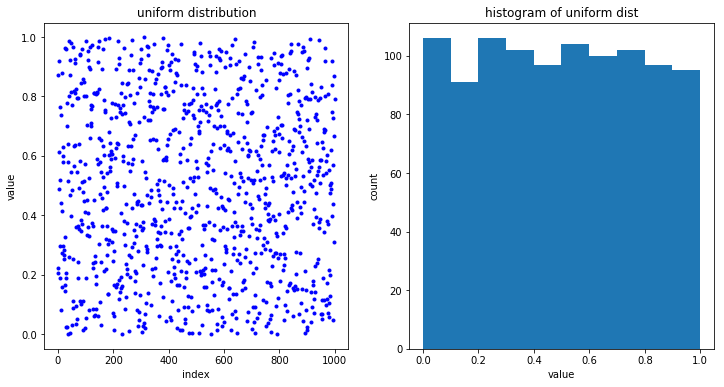

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(uni_dist, "b.")
ax1.set(title="uniform distribution", ylabel="value", xlabel="index")
ax2.hist(uni_dist)
ax2.set(title="histogram of uniform dist", ylabel="count", xlabel="value");

### Repeat for a normal distribution with $\mu$, and $\sigma$ from 11-pandas4

#### First read in the $\mu$, $\sigma$ values from `fit_metadata.json`

In [4]:
json_file = context.weather_processed_dir / 'fit_metadata.json'
with open(json_file, 'r') as f:
    fit_dict=json.load(f)
fit_dict

{'metadata': '\n          loc,scale tuples for daily average temperature (deg C)\n          and precipitation (mm) produced by 11-pandas4 for YVR\n          ',
 'temp': {'djf': [3.84256591465072, 3.595365405560527],
  'mam': [9.3567180174146, 3.479092767150887],
  'jja': [16.88648212846009, 2.324995343255562],
  'son': [10.308878631550368, 4.372545963729551]},
 'precip': {'djf': [0.0, 4.8432998097309055],
  'mam': [0.0, 2.6097253851306093],
  'jja': [0.0, 1.2523918301531844],
  'son': [0.0, 3.770662503393972]}}

#### Now pull the mean and standard deviation for spring

In [5]:
mu, sigma = fit_dict['temp']['mam']

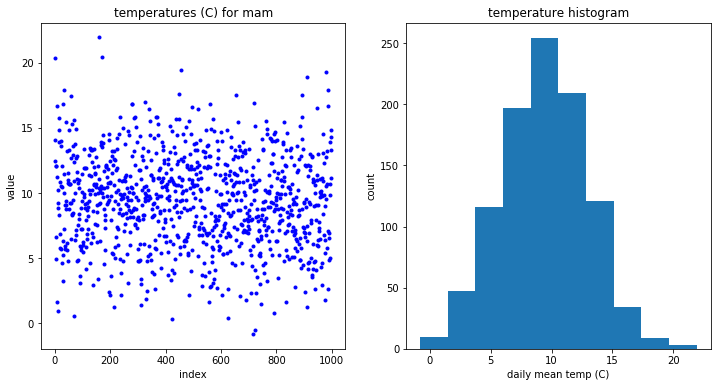

In [6]:
normal_dist = rn.normal(mu, sigma, (1000,))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(normal_dist, "b.")
ax1.set(title="temperatures (C) for mam", ylabel="value", xlabel="index")
ax2.hist(normal_dist)
ax2.set(title="temperature histogram", ylabel="count", xlabel="daily mean temp (C)");

## lognormal random numbers with $\mu=1$, $\log \sigma=0.1$

Note that there are dozens of distributions defined by
[numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html)

Here is an example for lognormal statistics

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'histogram of lognormal dist')]

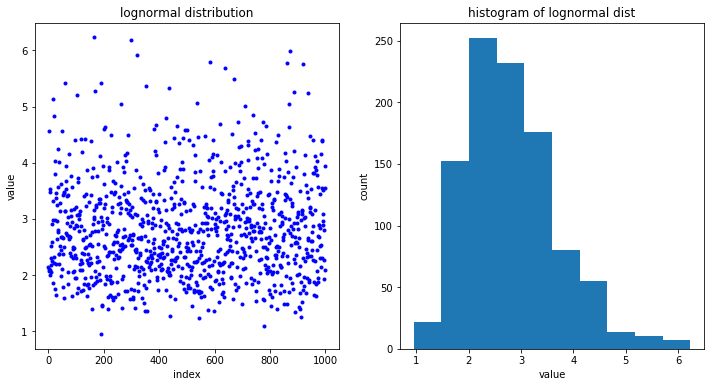

In [7]:
log_normal_dist = rn.lognormal(1, 0.3, (1000,))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(log_normal_dist, "b.")
ax1.set(title="lognormal distribution", ylabel="value", xlabel="index")
ax2.hist(log_normal_dist)
ax2.set(title="histogram of lognormal dist", ylabel="count", xlabel="value");

## Correlated random numbers

In [8]:
def makeRandom(
    meanx=None, stdx=None, meany=None, stdy=None, rho=None, numpoints=100000
):

    """
    return a tuple with two vectors (xvec,yvec) giving the
    coordinates of numpoints chosen from a two dimensional
    Gaussian distribution

    Parameters
    ----------

    meanx: float -- mean in x direction
    stdx:  float -- standard deviation in x direction
    meany: float -- mean in y direction
    stdy:  float -- standar deviation in y direction
    rho:   float -- correlation coefficient
    numpoints:  length of returned xvec and yvec


    Returns
    -------

    (xvec, yvec): tuple of ndarray vectors containing
                  correlated random variables, 
                  each vector of length numpoints

    Example
    -------

    invalues={'meanx':450.,
              'stdx':50,
              'meany':-180,
              'stdy':40,
              'rho':0.8}

    chanx,chany=makeRandom(**invalues)


    """
    sigma = np.array([stdx ** 2.0, rho * stdx * stdy, rho * stdx * stdy, stdy ** 2.0])
    sigma.shape = [2, 2]
    meanvec = [meanx, meany]
    outRandom = rn.multivariate_normal(meanvec, sigma, [numpoints])
    chan1 = outRandom[:, 0]
    chan2 = outRandom[:, 1]
    return (chan1, chan2)

In [9]:
invalues = {
    "meanx": 450.0,
    "stdx": 50,
    "meany": -180,
    "stdy": 40,
    "rho": 0.8,
    "numpoints": 25000,
}

chanx, chany = makeRandom(**invalues)

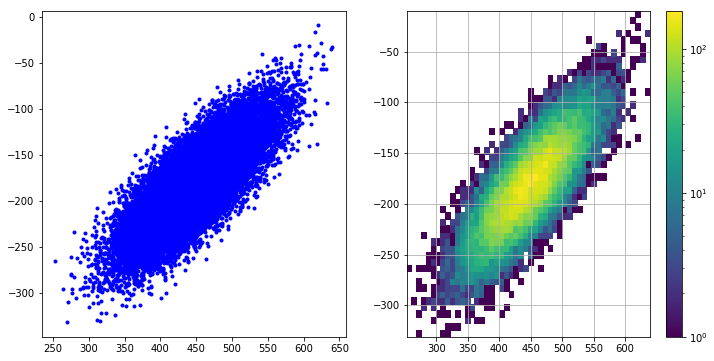

In [10]:
# https://matplotlib.org/gallery/statistics/hist.html
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(chanx, chany, "b.")
h, x, y, im = ax2.hist2d(chanx, chany, bins=(50, 50), norm=colors.LogNorm())
fig.colorbar(im)
ax2.grid(True)

## Your turn

1. Generate a precipitation dataset for YVR springtime using 
   [numpy.random.exponential](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html#numpy.random.exponential)
   
1. We have been assuming that precipitation and temperature are independent
   random variables.  Make a scatterplot and 2D histogram of one of the YVR
   seasonal precipitation, temperature dataframes.  Do you see any
   correlation?   What does [numpy.correlate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html) say?